In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['Cluster'], test_size=0.2, random_state=42
)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
accuracy = knn.score(X_test, y_test)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 97.50%


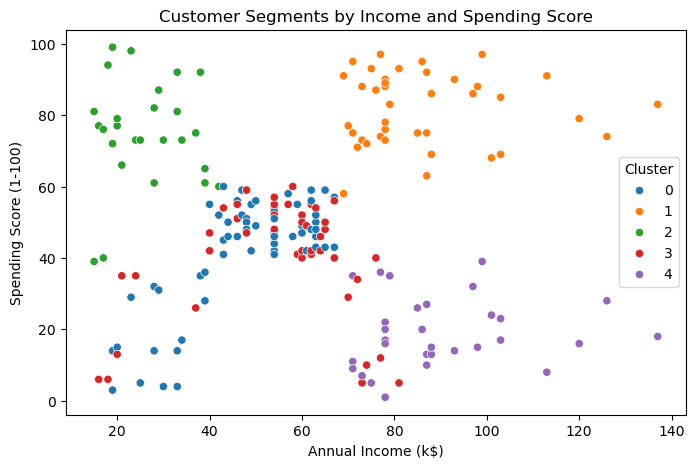

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segments by Income and Spending Score")
plt.show()